## Logistic Regression using Gradient Descent

This Notebook is an illustraion of performing Logistic Regression using Gradient Descent.
Also, I have used random values as the training set

In [1]:
import numpy as np
from sklearn import model_selection 
from gd_package import LogisticRegression

In [2]:
def generate_random_samples(samples, features, add_x0 = True):
    X = np.random.rand(samples, features)
    y = np.ones(samples)
    half = int(samples/2)
    y[:half] = 0
    np.random.shuffle(y)
    y = np.expand_dims(y, axis=1)
    if (add_x0):
        X0 = np.ones((samples,1))
        X = np.concatenate((X0, X), axis = 1)
    return X, y

def generate_train_test_samples(X, y, test_size = 0.33):    
    return model_selection.train_test_split(X, y, test_size=test_size, random_state=42)

def gradient_descent(X_train, y_train, X_test, y_test, iterations = 200, alpha_lr = 0.02):
    
    m_samples = X_train.shape[0]
    n_features = X_train.shape[1]
    cost_history = []
    samples_list = []
    y_test_pred = None
    y_train_pred = None
    
    logRegObj = LogisticRegression(m_samples, n_features)
    for i in range(0, iterations):
    
        y_train_pred = logRegObj.get_predictions(X_train)
        y_test_pred = logRegObj.get_predictions(X_test)
        
        #Update Gradients
        logRegObj.calculate_gradients(alpha_lr, X_train, y_train_pred, y_train)
        
        #Calculate Cost
        logRegObj.calculate_cost(y_train_pred, y_train)
    
    y_train_pred_class = logRegObj.convert_predictions_to_classes(y_train_pred)
    y_test_pred_class = logRegObj.convert_predictions_to_classes(y_test_pred)
    
    logRegObj.evaluate_model(y_train_pred_class, y_train, y_test_pred_class, y_test)
    logRegObj.display_metrics()
        
    return y_train_pred_class, y_test_pred_class


Train Accuracy : 0.5074626865671642
Test Accuracy : 0.4909090909090909
-----------------------------------------
Precision Score (Test Set) : 0.5121951219512195
Of All Values where the model predicted 1, what fraction of them were actually 1 [TP / TP + FP]
-----------------------------------------
Recall Score (Test Set) : 0.3684210526315789
Of All Values that are 1, what fraction of them did the model correctly predict as 1 [TP / TP + FN]
-----------------------------------------


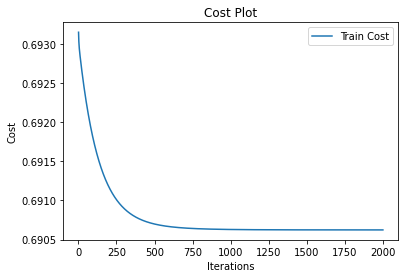

In [3]:
X, y = generate_random_samples(1000, 10)
X_train, X_test, y_train, y_test = generate_train_test_samples(X, y, test_size = 0.33)
y_train_pred_class, y_test_pred_class = gradient_descent(X_train, y_train, X_test, y_test, iterations = 2000, alpha_lr = 0.2)